# **차량 공유업체의 차량 파손 여부 분류하기**

## 0.미션

* 1) 미션1 : Data Preprocessing
    - **과제 수행 목표**
        - 본인의 구글 드라이브에 모델링 수행을 위해 적절한 폴더 및 파일로 **일관성 있게 정리**해야 합니다.
        - 제공된 데이터 : Car_Images.zip
            * Car_Images : 차량의 정상/파손 이미지 무작위 수집

* 2) 미션2 : CNN 모델링
    - **과제 수행 목표**
        - Tensorflow Keras를 이용하여 모델을 3개 이상 생성하세요.
            - 모델 구조와 파라미터는 자유롭게 구성하세요.
            - 단, 세부 목차에서 명시한 부분은 지켜주세요.

* 3) 미션3 : Data Argumentation & Transfer Learning
    - **과제 수행 목표**
        - 성능 개선을 위해 다음의 두가지를 시도하세요.
            * Data Augmentation을 적용하세요.(Image Generator)
            * Transfer Learning(VGG16)


## 1.환경설정 

### (1) 데이터셋 폴더 생성
- **세부요구사항**
    - C드라이브에 Datasets라는 폴더를 만드세요.
        - 구글드라이브를 사용하는경우 드라이브 첫 화면에 Datasets 라는 폴더를 만드세요. ('/content/drive/MyDrive/Datasets/')
    - 해당 폴더 안에 Car_Images.zip 파일을 넣으세요.

* 구글 Colab을 이용하는 경우

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (2) 데이터셋 불러오기 
- **세부요구사항**
    - Car_Images.zip 파일을 C:/Datasets/ 경로에 압축 해제합니다.
    - zipfile 모듈을 이용하거나 다른 방식을 사용해도 됩니다.
        - 참고 자료 : [zipfile document](https://docs.python.org/3/library/zipfile.html#zipfile-objects)
    - 폴더구조(로컬)
        * C:/Datasets/ : 압축파일
        * C:/Datasets/Car_Images_train/ : 압축 해제한 이미지 저장소
    - 폴더구조(구글드라이브브)
        * /content/drive/MyDrive/Datasets/ : 압축파일
        * /content/drive/MyDrive/Datasets/Car_Images_train/ : 압축 해제한 이미지 저장소
    - 압축을 해제하면 다음과 같은 두 하위 폴더가 생성됩니다.
        * normal, abnormal : 각 폴더에는 이미지들이 있습니다.
        * 이후 단계에서 해당 경로로 부터 validation, test 셋을 추출하게 됩니다.
        

In [ ]:
import zipfile

In [ ]:
# 압축파일 경로
# 구글 드라이브인 경우 경로에 맞게 지정하세요.
# dataset_path  = '/content/drive/MyDrive/Datasets/'
dataset_path = 'C:/Datasets/'

file_path = dataset_path + 'Car_Images.zip'

### (3) 이미지 저장을 위한 폴더 생성
- **세부요구사항**
    - train, validation, test 을 위해 각각 하위 폴더 normal과 abnormal를 준비합니다.
        - train
            * 정상 이미지 저장소 : C:/Datasets/Car_Images_train/normal/ 
                * 구글드라이브 :   /content/drive/MyDrive/Datasets/Car_Images_train/normal/
            * 파손 이미지 저장소 : C:/Datasets/Car_Images_train/abnormal/
                * 구글드라이브 : /content/drive/MyDrive/Datasets/Car_Images_train/abnormal/
        - val, test 역시 동일한 구조로 생성합니다.
    - 직접 탐색기에서 폴더를 생성할 수도 있고, os 모듈을 이용하여 코드로 작성할 수도 있습니다.
        - 참고 자료 : [os document](https://docs.python.org/3/library/os.html)

In [ ]:

# 이미지 저장을 위한 폴더 만들어 주기
!mkdir /content/drive/MyDrive/Datasets/Car_Images_train; mkdir /content/drive/MyDrive/Datasets/Car_Images_train/normal
!mkdir /content/drive/MyDrive/Datasets/Car_Images_train; mkdir /content/drive/MyDrive/Datasets/Car_Images_train/abnormal

!mkdir /content/drive/MyDrive/Datasets/Car_Images_val; mkdir /content/drive/MyDrive/Datasets/Car_Images_val/normal
!mkdir /content/drive/MyDrive/Datasets/Car_Images_val; mkdir /content/drive/MyDrive/Datasets/Car_Images_val/abnormal

!mkdir /content/drive/MyDrive/Datasets/Car_Images_test; mkdir /content/drive/MyDrive/Datasets/Car_Images_test/normal
!mkdir /content/drive/MyDrive/Datasets/Car_Images_test; mkdir /content/drive/MyDrive/Datasets/Car_Images_test/abnormal


mkdir: cannot create directory ‘/content/drive/MyDrive/Datasets/Car_Images_train’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/Datasets/Car_Images_val’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/Datasets/Car_Images_test’: File exists


## 2.데이터 전처리

### (1) 데이터 분할 : Training set | Validation set | Test set 생성
- **세부요구사항**
    - Training set, Validation set, Test set을 만듭니다.
        * size
            * test : 전체에서 20%를 추출합니다.
            * validation : test를 떼어낸 나머지에서 다시 20%를 추출합니다.
        * 데이터는 랜덤하게 추출해야 합니다.
            - random, shutil 모듈을 이용하여 랜덤하게 추출할 수 있습니다.
                - [random document](https://docs.python.org/3/library/random.html) | [shutil document](https://docs.python.org/3/library/shutil.html)
            * 해당 모듈 이외에 자신이 잘 알고 있는 방법을 사용해도 됩니다.
---

In [ ]:
import random, shutil
from glob import glob
import os

In [ ]:
tr_n_path = '/content/drive/MyDrive/Datasets/Car_Images/normal'
tr_ab_path = '/content/drive/MyDrive/Datasets/Car_Images/abnormal'

In [ ]:
# 전체 이미지 갯수를 확인합니다.
len(os.listdir(tr_n_path)) , len(os.listdir(tr_ab_path))

(302, 303)

In [ ]:
# test 사이즈 : 전체 이미지의 20%
te_data_num = [round(len(os.listdir(tr_n_path))*0.2), round(len(os.listdir(tr_ab_path))*0.2)]
print(te_data_num)

# validation 사이즈 : test를 제외한 나머지 중에서 20%
val_data_num = [ round((len(os.listdir(tr_n_path))-te_data_num[0])*0.2) , round((len(os.listdir(tr_n_path))-te_data_num[1])*0.2) ]
print(val_data_num)

# # train 사이즈
train_data_num = [len(os.listdir(tr_n_path)) - te_data_num[0] - val_data_num[0],
                  len(os.listdir(tr_ab_path))- te_data_num[1] - val_data_num[1]]
print(train_data_num)

[60, 61]
[48, 48]
[194, 194]


In [ ]:
train_n_dir = '/content/drive/MyDrive/Datasets/Car_Images_train/normal'
train_ab_dir = '/content/drive/MyDrive/Datasets/Car_Images_train/abnormal'

test_n_dir = '/content/drive/MyDrive/Datasets/Car_Images_test/normal'
test_ab_dir = '/content/drive/MyDrive/Datasets/Car_Images_test/abnormal'

val_n_dir = '/content/drive/MyDrive/Datasets/Car_Images_val/normal'
val_ab_dir = '/content/drive/MyDrive/Datasets/Car_Images_val/abnormal'

In [ ]:
files = os.listdir(tr_n_path)
files2 = os.listdir(tr_ab_path)

train_n_files = files[:train_data_num[0]]
val_n_files = files[train_data_num[0]:train_data_num[0]+val_data_num[0]]
test_n_files = files[train_data_num[0]+val_data_num[0]:]

train_ab_files = files2[:train_data_num[1]]
val_ab_files = files2[train_data_num[1]:train_data_num[1]+val_data_num[1]]
test_ab_files = files2[train_data_num[1]+val_data_num[1]:]

In [ ]:
train_ab_files[0]

'DALL·E 2023-03-10 18.53.06 - scratched car.png'

#### 2) test 셋 추출

In [ ]:
random.seed(2023)
#normal data분리
for file in train_n_files:
  shutil.copy(os.path.join(tr_n_path, file), train_n_dir)
for file in test_n_files:
  shutil.copy(os.path.join(tr_n_path, file), test_n_dir)
for file in val_n_files:
  shutil.copy(os.path.join(tr_n_path, file), val_n_dir)

#abnormal 분리
for file in train_ab_files:
  shutil.copy(os.path.join(tr_ab_path, file), train_ab_dir)
for file in test_ab_files:
  shutil.copy(os.path.join(tr_ab_path, file), test_ab_dir)
for file in val_ab_files:
  shutil.copy(os.path.join(tr_ab_path, file), val_ab_dir)

### (2) 데이터 복사 및 이동
- **세부요구사항**
    - 분할된 데이터를 복사 이동합니다.
        - 새로운 폴더에 저장하는 데이터로 "3.모델링I"에서 사용합니다.
        - 기존 폴더는 "4.모델링II > (1) Data Augmentation"에서 사용합니다.
    - Training set | Validation set | Test set의 데이터를 **새로운 폴더**에 복사하세요.
        - 새로운 폴더 명
            * copy_images/trainset
            * copy_images/validset
            * copy_images/testset
        - 새로운 폴더에는 normal, abnormal 파일 모두를 복사합니다. 
            * 파일을 구분하기 위해 abnormal 파일들은 파일명 앞에 접두사 'ab_'를 붙입시다.
        - os, shutil 모듈을 활용하세요.

#### 1) abnormal 파일 복사

* 복사하기 : shutil.copytree()

In [ ]:
from distutils.dir_util import copy_tree

In [ ]:
train_path = '/content/drive/MyDrive/Datasets/copy_images/trainset'
test_path = '/content/drive/MyDrive/Datasets/copy_images/testset'
val_path = '/content/drive/MyDrive/Datasets/copy_images/validset'

shutil.copytree(train_n_dir, train_path)
shutil.copytree(test_n_dir, test_path)
shutil.copytree(val_n_dir, val_path)

for filename in os.listdir(train_ab_dir):
  shutil.copy(os.path.join(train_ab_dir, filename), os.path.join(train_path, "ab_" + filename))
for filename in os.listdir(test_ab_dir):
  shutil.copy(os.path.join(test_ab_dir, filename), os.path.join(test_path, "ab_" + filename))
for filename in os.listdir(val_ab_dir):
  shutil.copy(os.path.join(val_ab_dir, filename), os.path.join(val_path, "ab_" + filename))

In [ ]:
train_path = '/content/drive/MyDrive/Datasets/copy_images/trainset'
test_path = '/content/drive/MyDrive/Datasets/copy_images/testset'
val_path = '/content/drive/MyDrive/Datasets/copy_images/validset'

* 데이터 갯수 조회

In [ ]:
print(len(os.listdir(train_path)))
print(len(os.listdir(test_path)))
print(len(os.listdir(val_path)))

388
121
96


## 3.모델링 I
* **세부요구사항**
    * 모델링을 위한 데이터 구조 만들기
        * x : 이미지를 array로 변환합니다.
        * y : 이미지 갯수만큼 normal - 0, abnormal - 1 로 array를 만듭니다.
    * 모델을 최소 3개 이상 만들고 성능을 비교합니다.
        * 모델 학습 과정에 알맞은 보조 지표를 사용하세요.
        * 전처리 과정에서 생성한 Validation set을 적절하게 사용하세요.
        * Early Stopping을 반드시 사용하세요.
            * 최적의 가중치를 모델에 적용하세요.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### (1) X : image to array
- **세부요구사항**
    * 모델링을 위해서는 np.array 형태로 데이터셋을 만들어야 합니다.
    * Training set / Validation set / Test set의 X는 이미지 형태로 되어있습니다. 
    * 이미지 파일을 불러와 train, valid, test 각각 array 형태로 변환해 봅시다.
        * 각 폴더로 부터 이미지 목록을 만들고
        * 이미지 한장씩 적절한 크기로 로딩하여 (keras.utils.load_img)
            * 이미지가 너무 크면 학습시간이 많이 걸리고, 메모리 부족현상이 발생될 수 있습니다.
            * 이미지 크기를 280 * 280 * 3 이내의 크기를 설정하여 로딩하시오.
            * array로 변환 (keras.utils.img_to_array, np.expand_dims)
        * 데이터셋에 추가합니다.(데이터셋도 array)

#### 1) 이미지 목록 만들기
* train, validation, test 폴더로 부터 이미지 목록을 생성합니다.

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image


In [ ]:
import glob

In [ ]:
# 이미지 목록 저장, 파일이름들 path 는 단순한 경로
img_train_list = os.listdir(train_path)
img_valid_list = os.listdir(val_path)
img_test_list = os.listdir(test_path)

In [ ]:
img = image.load_img(train_path + '/' + img_train_list[0], grayscale=False, target_size = (280,280))

In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:
x_train = []

for path in img_train_list :
  img = image.load_img(train_path + '/' + path, grayscale=False, target_size = (280,280))
  img = image.img_to_array(img)
  img = preprocess_input(img)
  x_train.append(img)

x_train = np.array(x_train)

In [ ]:
x_val = []

for path in img_valid_list :
  img = image.load_img(val_path + '/' + path, grayscale=False, target_size = (280,280))
  img = image.img_to_array(img)
  img = preprocess_input(img)

  x_val.append(img)


x_val = np.array(x_val)

In [ ]:
x_test = []

for path in img_test_list :
  img = image.load_img(test_path + '/' + path, grayscale=False, target_size = (280,280))
  img = image.img_to_array(img)
  img = preprocess_input(img)

  x_test.append(img)

x_test = np.array(x_test)

In [ ]:
# 메모리, 처리시간을 위해서 이미지 크기 조정
img_size = 280 ## 사이즈 조정 가능



#### 2) 이미지들을 배열 데이터셋으로 만들기

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

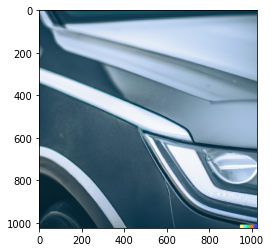

In [ ]:
a = val_path + '/' + img_train_list[0]
image = np.array(Image.open(a))

plt.imshow(image)


### (2) y : 클래스 만들기
- **세부요구사항**
    - Training set / Validation set / Test set의 y를 생성합니다.
        - 각각 normal, abnormal 데이터의 갯수를 다시 확인하고
        - normal을 0, abnormal을 1로 지정합니다.

In [ ]:
# 데이터 갯수 확인
print( len(img_train_list) )
print( len([val for val in img_train_list if val.startswith('ab_')]) )
print('---')
print( len(img_valid_list) )
print( len([val for val in img_valid_list if val.startswith('ab_')]) )
print('---')
print( len(img_test_list) )
print( len([val for val in img_test_list if val.startswith('ab_')]) )

388
194
---
96
48
---
121
61


#npzeros로 원핫인코딩 만들면?

In [ ]:
def vectorizer_sequence(seq):
  result = np.zeros(len(seq))

  for i, s in enumerate(seq):
    if s.startswith('ab_'):
      result[i] = 1.
  return result

In [ ]:
y_train = vectorizer_sequence(img_train_list)
y_val = vectorizer_sequence(img_valid_list)
y_test = vectorizer_sequence(img_test_list)

In [ ]:
y_train = []
for n, val in enumerate(img_train_list):
  if val.startswith('ab_'):
    y_train.append([1,0])
  else:
    y_train.append([0,1])

y_train = np.array(y_train)

In [ ]:
y_test = []
for n, val in enumerate(img_test_list):
  if val.startswith('ab_'):
    y_test.append([1,0])
  else:
    y_test.append([0,1])

y_test = np.array(y_test)

In [ ]:
y_val = []
for n, val in enumerate(img_valid_list):
  if val.startswith('ab_'):
    y_val.append([1,0])
  else:
    y_val.append([0,1])

y_val = np.array(y_val)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import *

In [ ]:
from tensorflow.keras.applications import VGG16, MobileNet

### 1) mobilenet모델 파인 튜닝

In [ ]:
mobilenet = MobileNet(weights='imagenet', input_shape=(280,280,3), include_top=False)
model =Sequential()

model.add(mobilenet)

model.add(Flatten())
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 8, 8, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 batch_normalization_1 (Batc  (None, 65536)            262144    
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 65536)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 131074    
                                                                 
Total params: 3,622,082
Trainable params: 3,469,122
No

In [ ]:
history = model.compile(optimizer='Adam',
                loss = 'binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
es = [EarlyStopping(patience=5, monitor='val_loss')]

In [ ]:
history_v1 = model.fit(x_train, y_train,
            batch_size=64,
            epochs=100,
            validation_data=(x_val, y_val),
            callbacks = es)

Epoch 1/100
7/7 [==============================] - 15s 432ms/step - loss: 0.5097 - accuracy: 0.8196 - val_loss: 4.5339 - val_accuracy: 0.6667
Epoch 2/100
7/7 [==============================] - 2s 332ms/step - loss: 0.0466 - accuracy: 0.9923 - val_loss: 17.2298 - val_accuracy: 0.5312
Epoch 3/100
7/7 [==============================] - 2s 328ms/step - loss: 0.0429 - accuracy: 0.9948 - val_loss: 28.0721 - val_accuracy: 0.5104
Epoch 4/100
7/7 [==============================] - 2s 331ms/step - loss: 0.0064 - accuracy: 0.9974 - val_loss: 26.4820 - val_accuracy: 0.5312
Epoch 5/100
7/7 [==============================] - 2s 332ms/step - loss: 0.0132 - accuracy: 0.9948 - val_loss: 18.0839 - val_accuracy: 0.5729
Epoch 6/100
7/7 [==============================] - 2s 335ms/step - loss: 0.0537 - accuracy: 0.9845 - val_loss: 22.8049 - val_accuracy: 0.5312


In [ ]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 62ms/step


In [ ]:
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print(accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

[[ 1 60]
 [ 0 60]]
0.5041322314049587


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history_v1.history.keys()

plt.plot(history_v1.history['loss'],'r--')
plt.plot(history_v1.history['val_loss'],'b--')

In [ ]:
y_test_v1 = y_test.flatten()

In [ ]:
y_pred_v1 = np.where(y_pred>0.5 , 1 , 0)

In [ ]:
y_pred_v1.shape

(121, 2)

In [ ]:
print(confusion_matrix(y_test_v1, y_pred_v1))

In [ ]:
print(classification_report(y_test_v1, y_pred_v1))

In [ ]:
현재 val evaluate가 너무 낮게 나옴
간단한 모델로 하면서 agu써보고 모델 조금 더 깊숙히

vgg16써보기
다른 모델 돌려보기
augmentation

전처리 현재는 -1~1사이 인거라서 안되니깐
내일은 minmax랑 standard해보기

# 원핫인코딩 벡터화
## 1) mobilenet모델 파인 튜닝

In [ ]:
mobilenet = MobileNet(weights='imagenet', input_shape=(280,280,3), include_top=False)
model =Sequential()

model.add(mobilenet)

model.add(Flatten())
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer= Adam(learning_rate=1e-5),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 8, 8, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 65536)             0         
                                                                 
 batch_normalization_13 (Bat  (None, 65536)            262144    
 chNormalization)                                                
                                                                 
 activation_13 (Activation)  (None, 65536)             0         
                                                                 
 dense_13 (Dense)            (None, 1)                 65537     
                                                                 
Total params: 3,556,545
Trainable params: 3,403,585
N

In [ ]:
es = [EarlyStopping(patience=5, monitor='val_loss')]

In [ ]:
history_v2 = model.fit(x_train, y_train,
            batch_size=32,
            epochs=1000,
            validation_data=(x_val, y_val),
            callbacks = es)

Epoch 1/1000
13/13 [==============================] - 14s 226ms/step - loss: 0.7139 - accuracy: 0.5902 - val_loss: 0.6148 - val_accuracy: 0.7500
Epoch 2/1000
13/13 [==============================] - 2s 176ms/step - loss: 0.4891 - accuracy: 0.7552 - val_loss: 0.5062 - val_accuracy: 0.8125
Epoch 3/1000
13/13 [==============================] - 2s 176ms/step - loss: 0.3649 - accuracy: 0.8582 - val_loss: 0.4283 - val_accuracy: 0.8542
Epoch 4/1000
13/13 [==============================] - 2s 177ms/step - loss: 0.2815 - accuracy: 0.9124 - val_loss: 0.3814 - val_accuracy: 0.8646
Epoch 5/1000
13/13 [==============================] - 2s 178ms/step - loss: 0.2450 - accuracy: 0.9330 - val_loss: 0.3543 - val_accuracy: 0.8750
Epoch 6/1000
13/13 [==============================] - 2s 178ms/step - loss: 0.1987 - accuracy: 0.9588 - val_loss: 0.3270 - val_accuracy: 0.8750
Epoch 7/1000
13/13 [==============================] - 2s 179ms/step - loss: 0.1748 - accuracy: 0.9768 - val_loss: 0.3081 - val_accuracy

In [ ]:
y_pred2 = model.predict(x_test)

4/4 [==============================] - 1s 66ms/step


In [ ]:
y_pred2 = np.where(y_pred2 >0.5 , 1 , 0)

In [ ]:
print(confusion_matrix(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
#1이 비정상

[[59  1]
 [ 2 59]]
0.9752066115702479
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98        60
         1.0       0.98      0.97      0.98        61

    accuracy                           0.98       121
   macro avg       0.98      0.98      0.98       121
weighted avg       0.98      0.98      0.98       121



<Axes: >

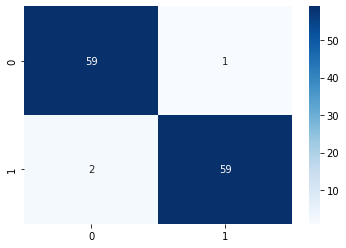

In [ ]:
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, cmap='Blues')

### data augmentation 적용 후 모델링

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

In [ ]:
idg = ImageDataGenerator(rotation_range=20,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         zoom_range=0.1,
                         shear_range=0.1,
                         horizontal_flip=True,
                         vertical_flip=True)

idg.fit(x_train)

In [ ]:
train_idg = idg.flow(x_train, y_train)

In [ ]:
history_v2 = model.fit(train_idg,
                      batch_size=64,
                      epochs=1000,
                      validation_data=(x_val, y_val),
                      callbacks = es)

Epoch 1/1000
13/13 [==============================] - 7s 511ms/step - loss: 0.1651 - accuracy: 0.9433 - val_loss: 0.1240 - val_accuracy: 0.9479
Epoch 2/1000
13/13 [==============================] - 6s 451ms/step - loss: 0.1616 - accuracy: 0.9330 - val_loss: 0.1228 - val_accuracy: 0.9479
Epoch 3/1000
13/13 [==============================] - 6s 444ms/step - loss: 0.1361 - accuracy: 0.9588 - val_loss: 0.1279 - val_accuracy: 0.9479
Epoch 4/1000
13/13 [==============================] - 6s 445ms/step - loss: 0.1545 - accuracy: 0.9330 - val_loss: 0.1286 - val_accuracy: 0.9583
Epoch 5/1000
13/13 [==============================] - 6s 454ms/step - loss: 0.1225 - accuracy: 0.9562 - val_loss: 0.1230 - val_accuracy: 0.9583
Epoch 6/1000
13/13 [==============================] - 6s 481ms/step - loss: 0.1412 - accuracy: 0.9562 - val_loss: 0.1270 - val_accuracy: 0.9479
Epoch 7/1000
13/13 [==============================] - 6s 446ms/step - loss: 0.1441 - accuracy: 0.9536 - val_loss: 0.1261 - val_accuracy:

In [ ]:
pred_3 = model.predict(x_test)

4/4 [==============================] - 0s 63ms/step


In [ ]:
pred_3 = np.where(pred_3 > 0.5, 1, 0)

In [ ]:
print(f'accuracy score : {accuracy_score(y_test, pred_3)}')

accuracy score : 0.9834710743801653


<Axes: >

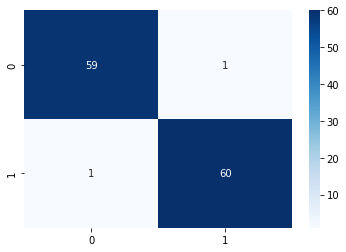

In [ ]:
cm = confusion_matrix(y_test, pred_3)
sns.heatmap(cm, annot=True, cmap='Blues')

## 2) RESNET50모델 파인튜닝

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input #resnet50쓰려면 resnet50전용 전처리

In [ ]:
x_train = []

for path in img_train_list :
  img = image.load_img(train_path + '/' + path, grayscale=False, target_size = (280,280))
  img = image.img_to_array(img)
  img = preprocess_input(img)
  x_train.append(img)

x_train = np.array(x_train)

In [ ]:
x_val = []

for path in img_valid_list :
  img = image.load_img(val_path + '/' + path, grayscale=False, target_size = (280,280))
  img = image.img_to_array(img)
  img = preprocess_input(img)

  x_val.append(img)


x_val = np.array(x_val)

In [ ]:
x_test = []

for path in img_test_list :
  img = image.load_img(test_path + '/' + path, grayscale=False, target_size = (280,280))
  img = image.img_to_array(img)
  img = preprocess_input(img)

  x_test.append(img)

x_test = np.array(x_test)

In [ ]:
resnet = ResNet50(weights='imagenet', input_shape=(280,280,3), include_top=False)
model2 =Sequential()

model2.add(resnet)

model2.add(Flatten())
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer= Adam(learning_rate=1e-4),
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 9, 9, 2048)        23587712  
                                                                 
 flatten_18 (Flatten)        (None, 165888)            0         
                                                                 
 batch_normalization_18 (Bat  (None, 165888)           663552    
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 165888)            0         
                                                                 
 dense_18 (Dense)            (None, 1)                 165889    
                                                                 
Total params: 24,417,153
Trainable params: 24,032,257
Non-trainable params: 384,896
___________________________________

In [ ]:
es = [EarlyStopping(patience=5, monitor='val_loss')]

In [ ]:
history_v2 = model2.fit(x_train, y_train,
            batch_size=32,
            epochs=1000,
            validation_data=(x_val, y_val),
            callbacks = es)

Epoch 1/1000
13/13 [==============================] - 38s 650ms/step - loss: 0.4902 - accuracy: 0.7784 - val_loss: 0.1732 - val_accuracy: 0.9375
Epoch 2/1000
13/13 [==============================] - 7s 576ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.2232 - val_accuracy: 0.9479
Epoch 3/1000
13/13 [==============================] - 7s 577ms/step - loss: 0.0170 - accuracy: 0.9948 - val_loss: 0.2222 - val_accuracy: 0.9479
Epoch 4/1000
13/13 [==============================] - 7s 563ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.2331 - val_accuracy: 0.9583
Epoch 5/1000
13/13 [==============================] - 7s 552ms/step - loss: 0.0105 - accuracy: 0.9948 - val_loss: 0.2970 - val_accuracy: 0.9375
Epoch 6/1000
13/13 [==============================] - 7s 545ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.2451 - val_accuracy: 0.9479


In [ ]:
pred_4 = model2.predict(x_test)

4/4 [==============================] - 1s 155ms/step


accuracy score : 0.9256198347107438


<Axes: >

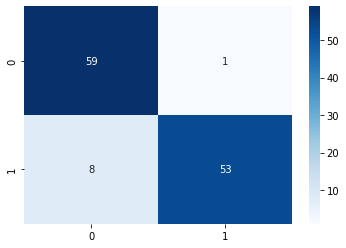

In [ ]:
pred_4 = np.where(pred_4 > 0.5, 1, 0)
print(f'accuracy score : {accuracy_score(y_test, pred_4)}')
cm = confusion_matrix(y_test, pred_4)
sns.heatmap(cm, annot=True, cmap='Blues')

### data augmentation 적용 후 모델링

In [ ]:
history_v2 = model2.fit(train_idg,
                      batch_size=64,
                      epochs=1000,
                      validation_data=(x_val, y_val),
                      callbacks = es)

Epoch 1/1000
13/13 [==============================] - 14s 642ms/step - loss: 0.2247 - accuracy: 0.8969 - val_loss: 0.4792 - val_accuracy: 0.8958
Epoch 2/1000
13/13 [==============================] - 8s 605ms/step - loss: 0.1640 - accuracy: 0.9485 - val_loss: 0.2918 - val_accuracy: 0.9375
Epoch 3/1000
13/13 [==============================] - 8s 605ms/step - loss: 0.0967 - accuracy: 0.9665 - val_loss: 0.1411 - val_accuracy: 0.9583
Epoch 4/1000
13/13 [==============================] - 8s 615ms/step - loss: 0.0991 - accuracy: 0.9716 - val_loss: 0.1561 - val_accuracy: 0.9583
Epoch 5/1000
13/13 [==============================] - 8s 664ms/step - loss: 0.0380 - accuracy: 0.9820 - val_loss: 0.3240 - val_accuracy: 0.9375
Epoch 6/1000
13/13 [==============================] - 8s 588ms/step - loss: 0.0322 - accuracy: 0.9897 - val_loss: 0.2867 - val_accuracy: 0.9375
Epoch 7/1000
13/13 [==============================] - 8s 613ms/step - loss: 0.0243 - accuracy: 0.9897 - val_loss: 0.2364 - val_accuracy

In [ ]:
pred_4 = model2.predict(x_test)

4/4 [==============================] - 1s 158ms/step


accuracy score : 0.9669421487603306


<Axes: >

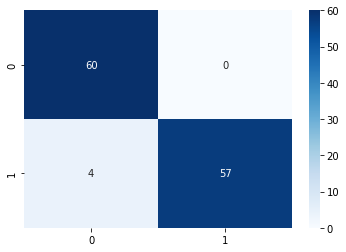

In [ ]:
pred_4 = np.where(pred_4 > 0.5, 1, 0)
print(f'accuracy score : {accuracy_score(y_test, pred_4)}')
cm = confusion_matrix(y_test, pred_4)
sns.heatmap(cm, annot=True, cmap='Blues')

## 3) Efficientnet 모델 파인 튜닝

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB1, preprocess_input

In [ ]:
x_train = []

for path in img_train_list :
  img = image.load_img(train_path + '/' + path, grayscale=False, target_size = (280,280))
  img = image.img_to_array(img)
  img = preprocess_input(img)
  x_train.append(img)

x_train = np.array(x_train)

In [ ]:
x_val = []

for path in img_valid_list :
  img = image.load_img(val_path + '/' + path, grayscale=False, target_size = (280,280))
  img = image.img_to_array(img)
  img = preprocess_input(img)

  x_val.append(img)


x_val = np.array(x_val)

In [ ]:
x_test = []

for path in img_test_list :
  img = image.load_img(test_path + '/' + path, grayscale=False, target_size = (280,280))
  img = image.img_to_array(img)
  img = preprocess_input(img)

  x_test.append(img)

x_test = np.array(x_test)

In [ ]:
efficient = EfficientNetB1(weights='imagenet', input_shape=(280,280,3), include_top=False)
model3 =Sequential()

model3.add(efficient)

model3.add(Flatten())
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer= Adam(learning_rate=1e-4),
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model3.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional)  (None, 9, 9, 1280)       6575239   
                                                                 
 flatten_22 (Flatten)        (None, 103680)            0         
                                                                 
 batch_normalization_22 (Bat  (None, 103680)           414720    
 chNormalization)                                                
                                                                 
 activation_22 (Activation)  (None, 103680)            0         
                                                                 
 dense_22 (Dense)            (None, 1)                 103681    
                                                                 
Total params: 7,093,640
Trainable params: 6,824,225
Non-trainable params: 269,415
_____________________________________

In [ ]:
history_v4 = model3.fit(x_train, y_train,
            batch_size=32,
            epochs=1000,
            validation_data=(x_val, y_val),
            callbacks = es)

Epoch 1/1000
13/13 [==============================] - 55s 748ms/step - loss: 0.6207 - accuracy: 0.6856 - val_loss: 0.3187 - val_accuracy: 0.8542
Epoch 2/1000
13/13 [==============================] - 8s 584ms/step - loss: 0.1483 - accuracy: 0.9510 - val_loss: 0.2954 - val_accuracy: 0.8542
Epoch 3/1000
13/13 [==============================] - 8s 587ms/step - loss: 0.0851 - accuracy: 0.9691 - val_loss: 0.1815 - val_accuracy: 0.9375
Epoch 4/1000
13/13 [==============================] - 8s 590ms/step - loss: 0.0233 - accuracy: 0.9948 - val_loss: 0.1905 - val_accuracy: 0.9271
Epoch 5/1000
13/13 [==============================] - 8s 586ms/step - loss: 0.0183 - accuracy: 0.9948 - val_loss: 0.1698 - val_accuracy: 0.9271
Epoch 6/1000
13/13 [==============================] - 8s 582ms/step - loss: 0.0268 - accuracy: 0.9948 - val_loss: 0.1749 - val_accuracy: 0.9375
Epoch 7/1000
13/13 [==============================] - 7s 575ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.1430 - val_accuracy

In [ ]:
pred_5 = model3.predict(x_test)

4/4 [==============================] - 2s 137ms/step


accuracy score : 0.9752066115702479


<Axes: >

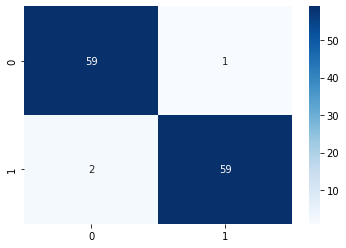

In [ ]:
pred_5 = np.where(pred_5 > 0.5, 1, 0)
print(f'accuracy score : {accuracy_score(y_test, pred_5)}')
cm = confusion_matrix(y_test, pred_5)
sns.heatmap(cm, annot=True, cmap='Blues')

In [ ]:
history_v5 = model3.fit(train_idg,
                      batch_size=64,
                      epochs=1000,
                      validation_data=(x_val, y_val),
                      callbacks = es)

Epoch 1/1000
13/13 [==============================] - 21s 790ms/step - loss: 0.3312 - accuracy: 0.8943 - val_loss: 0.1928 - val_accuracy: 0.9375
Epoch 2/1000
13/13 [==============================] - 8s 612ms/step - loss: 0.1608 - accuracy: 0.9381 - val_loss: 0.1276 - val_accuracy: 0.9688
Epoch 3/1000
13/13 [==============================] - 9s 628ms/step - loss: 0.0774 - accuracy: 0.9742 - val_loss: 3.2719 - val_accuracy: 0.9479
Epoch 4/1000
13/13 [==============================] - 9s 624ms/step - loss: 0.1218 - accuracy: 0.9613 - val_loss: 1.4449 - val_accuracy: 0.9479
Epoch 5/1000
13/13 [==============================] - 8s 617ms/step - loss: 0.0504 - accuracy: 0.9845 - val_loss: 77.3950 - val_accuracy: 0.8750
Epoch 6/1000
13/13 [==============================] - 8s 615ms/step - loss: 0.1123 - accuracy: 0.9613 - val_loss: 120.9438 - val_accuracy: 0.8125
Epoch 7/1000
13/13 [==============================] - 8s 616ms/step - loss: 0.1062 - accuracy: 0.9510 - val_loss: 415.0063 - val_acc

In [ ]:
pred_6 = model3.predict(x_test)

4/4 [==============================] - 0s 124ms/step


accuracy score : 0.6528925619834711


<Axes: >

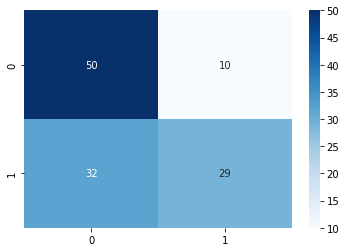

In [ ]:
pred_6 = np.where(pred_6 > 0.5, 1, 0)
print(f'accuracy score : {accuracy_score(y_test, pred_6)}')
cm = confusion_matrix(y_test, pred_6)
sns.heatmap(cm, annot=True, cmap='Blues')